## 25. Pandas: Create A Matplotlib Scatterplot From A Dataframe 

Datasets:
* https://www.kaggle.com/statchaitya/country-to-continent
* https://www.kaggle.com/erikbruin/countries-of-the-world-iso-codes-and-population
* https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

<img src="scatter_plot_1.png" alt="Drawing" style="width: 600px;"/>
<img src="scatter_plot_2.png" alt="Drawing" style="width: 600px;"/>

In [1]:
import chardet
import pandas as pd

df = pd.read_csv("../csv/covid/covid_19_clean_complete.csv")
population = pd.read_csv("../csv/covid/countries_by_population_2019.csv")

with open('../csv/covid/countryContinent.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

continent = pd.read_csv("../csv/covid/countryContinent.csv" , encoding=result['encoding'])

In [2]:
df.tail(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
15061,NaN,Barbados,13.1939,-59.5432,3/17/20,2,0,0
15062,NaN,Montenegro,42.5000,19.3000,3/17/20,2,0,0
15063,NaN,The Gambia,13.4667,-16.6000,3/17/20,1,0,0


In [3]:
population.head(3)

,Rank,name,pop2019,pop2018,GrowthRate,area,Density
0,1,China,1433783.686,NaN,1.0039,9706961.0,147.7068
1,2,India,1366417.754,NaN,1.0099,3287590.0,415.6290
2,3,United States,329064.917,NaN,1.0059,9372610.0,35.1092


In [4]:
continent.head(3)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0


## Step #1: Combine covid and continent data

In [5]:
df = df.merge(continent,  left_on='Country/Region', right_on='country', how='inner')

In [6]:
df.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,NaN,Thailand,15.0,101.0,1/22/20,2,0,0,Thailand,TH,THA,764,ISO 3166-2:TH,Asia,South-Eastern Asia,142.0,35.0
1,NaN,Thailand,15.0,101.0,1/23/20,3,0,0,Thailand,TH,THA,764,ISO 3166-2:TH,Asia,South-Eastern Asia,142.0,35.0
2,NaN,Thailand,15.0,101.0,1/24/20,5,0,0,Thailand,TH,THA,764,ISO 3166-2:TH,Asia,South-Eastern Asia,142.0,35.0


## Step #2: Get last value for Confirmed per country

In [7]:
last_confirmed_number = df[df.Confirmed > 0].groupby('Country/Region', as_index = False).last()[['Confirmed', 'Country/Region', 'Recovered']]
last_confirmed_number.head()

,Confirmed,Country/Region,Recovered
0,22,Afghanistan,1
1,55,Albania,0
2,60,Algeria,12
3,39,Andorra,1
4,1,Antigua and Barbuda,0


## Step #3:  Get first date of Confirmed per country

In [8]:
first_date = df[df.Confirmed > 0].groupby('Country/Region', as_index = False).first()[['Date', 'Country/Region', 'continent']]
first_date.head()

,Date,Country/Region,continent
0,2/24/20,Afghanistan,Asia
1,3/9/20,Albania,Europe
2,2/25/20,Algeria,Africa
3,3/2/20,Andorra,Europe
4,3/13/20,Antigua and Barbuda,Americas


## Step #4:  Combine last values and first date

In [9]:
df3 = last_confirmed_number.merge(first_date, on='Country/Region', how='inner')
df_final = df3.sort_values(by=['Confirmed', 'Date']).tail(20)
df_final.head()

,Confirmed,Country/Region,Recovered,Date,continent
92,236,Pakistan,2,2/26/20,Asia
97,238,Poland,13,3/4/20,Europe
109,266,Singapore,114,1/23/20,Asia
111,275,Slovenia,0,3/5/20,Europe
40,321,Finland,10,1/29/20,Europe


## Step #5: Convert dates to datetime and sort

In [10]:
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [11]:
df_final['Date'].sort_values()

63    2020-01-22
109   2020-01-23
75    2020-01-25
44    2020-01-27
40    2020-01-29
61    2020-01-31
118   2020-01-31
114   2020-02-01
15    2020-02-04
60    2020-02-21
119   2020-02-25
9     2020-02-25
90    2020-02-26
92    2020-02-26
46    2020-02-26
19    2020-02-26
99    2020-02-29
98    2020-03-02
97    2020-03-04
111   2020-03-05
Name: Date, dtype: datetime64[ns]

## Step #6:  Plot Data as Scatterplot
* x axis - Current Active Cases
* y axis - First Date Confirmed
* size of points - Current Recovered 

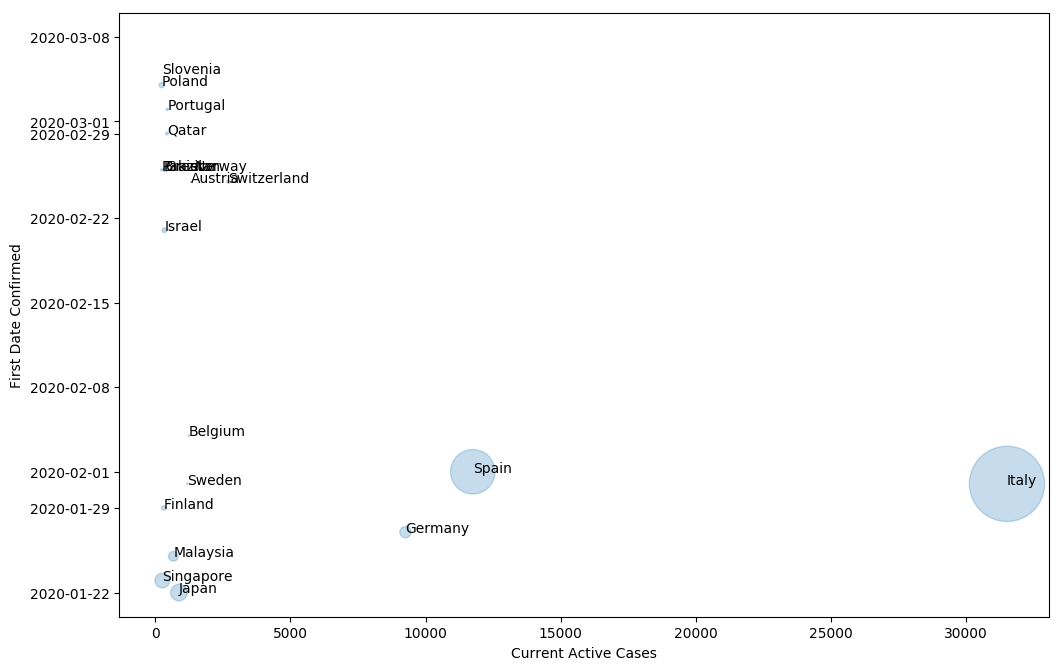

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')

plt.scatter(df_final.Confirmed, df_final.Date,  s=df_final.Recovered, alpha = 0.25)

[plt.text( x=row['Confirmed'], y=row['Date'], s=row['Country/Region']) for k,row in df_final.iterrows()]

plt.xlabel('Current Active Cases')
plt.ylabel('First Date Confirmed')

axes = plt.gca()
axes.set_ylim(['2020-01-20','2020-03-10'])

plt.show()

## Step #7:  Plot Data with continent colors

In [15]:
continent_colors = {'Europe':'red',
                 'Africa':'green',
                 'Americas':'blue',
                 'Asia':'cyan',
                 'Australia and New Zealand':'purple'}

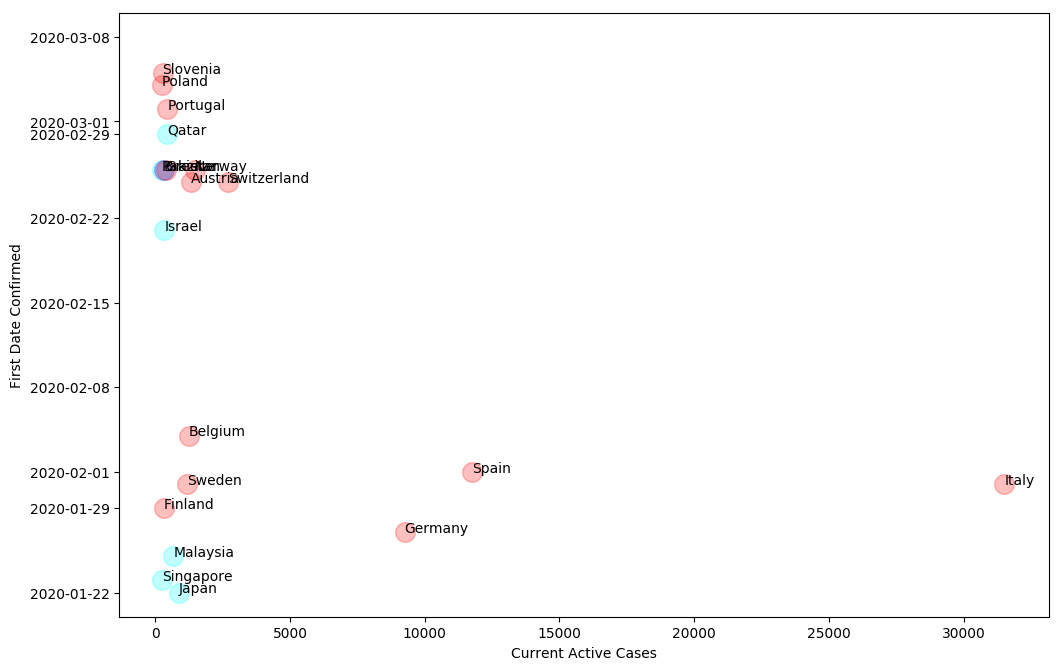

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')

plt.xlabel('Current Active Cases')
plt.ylabel('First Date Confirmed')

for i,j in df_final.iterrows():
    reg_color = continent_colors.get(j['continent'], 'black')
    plt.scatter(df_final['Confirmed'][i], df_final['Date'][i],  s=200, alpha = 0.25,  color=reg_color)

    
[plt.text( x=row['Confirmed'], y=row['Date'], s=row['Country/Region']) for k,row in df_final.iterrows()]    
axes = plt.gca()
axes.set_ylim(['2020-01-20','2020-03-10'])

plt.show()